## **О наборе данных (About Dataset)**

**Источник:** https://www.kaggle.com/datasets/arsalanjamal002/student-sleep-patterns

### **Описание (Description)**

Этот синтетический датасет содержит различные параметры, которые могут напрямую влиять на качество сна студентов.


**Столбцы (Columns):**

* **Student_ID**  - Int   -   ID студента
* **Age**      -          Int   -  Возраст
* **Gender**      -         Categorical   -  Пол
* **University_Year**           -        Categorical   -  Год обучения 
* **Sleep_Duration**            -         Float   -  продолжительность сна
* **Study_Hours**          -        Float -  Количество учебных часов
* **Screen_Time**  - Float -  Экранное время
* **Caffeine_Intake** -Int -  Употребление кофеина
* **Physical_Activity**  - Int -  Уровень физической активности
* **Sleep_Quality**   -  Int -  Оценка сна
* **Weekday_Sleep_Start**   -  Float -  Время начала сна в будние дни
* **Weekend_Sleep_Start**  -  Float  -   Время начала сна в выходные
* **Weekday_Sleep_End**  -  Float   -  Время пробуждения в будние дни
* **Weekend_Sleep_End**  -  Float  -   Время пробуждения в выходные

**Потенциальные области применения (Potential Use Cases):**

*   Анализа зависимости сна от образа жизни

## **Ход работы**

### **Выбор целевого атрибута (метки)**
В данном наборе данных атрибут Sleep_Quality является целевым классом (меткой), так как:
- Он содержит целочисленные значения 1-10, которые представляют собой классификацию качества сна студента.
- Остальные атрибуты (Такие как Sleep_Duration, Study_Hours, Physical_Activity и т.д.) являются признаками, которые могут влиять на определение уровня риска.

#### **Импорт необходимых библиотек**


In [81]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

### **Оценка сбалансированности классов**
Для оценки сбалансированности посчитаем количество записей для каждого класса в столбце Sleep_Quality

In [82]:
df = pd.read_csv('student_sleep_patterns.csv')

class_distribution = df['Sleep_Quality'].value_counts()
class_distribution

Sleep_Quality
1     66
6     57
9     55
3     54
10    50
2     46
4     46
7     45
5     41
8     40
Name: count, dtype: int64

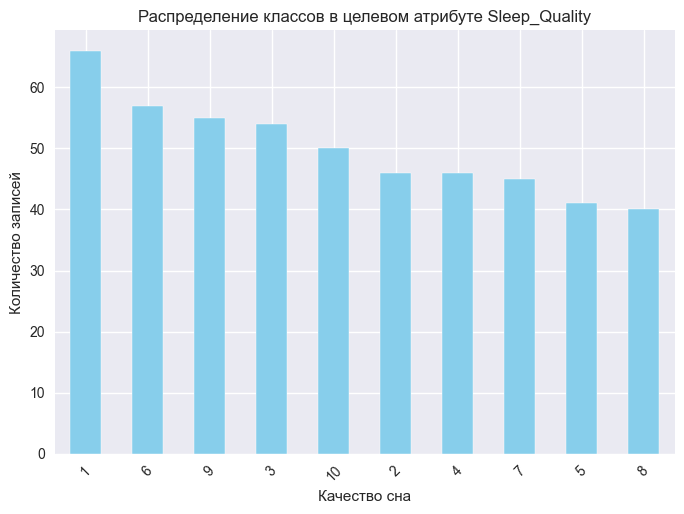

In [83]:
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Распределение классов в целевом атрибуте Sleep_Quality')
plt.xlabel('Качество сна')
plt.ylabel('Количество записей')
plt.xticks(rotation=45)
plt.show()

### **Классы слегка не сбалансированы**
Оценка 8 представлен всего 40 примерами, что почти в 1.65 раза меньше, чем оценка 1.

Но это небольшая разбалансировка, не сильно повлияет на качество предсказывания модели

### **Сравнение алгоритмов классификации: kNN и дерево решений**

#### **Обзор данных**

In [84]:
print("Размерность данных:", df.shape)
df['University_Year'] = df['University_Year'].str.extract('(\d+)').astype(int)
df.head()

Размерность данных: (500, 14)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/g7/mvdsfy9j5nj9gg66hdjn6d8m0000gn/T/ipykernel_9501/2115029878.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['University_Year'] = df['University_Year'].str.extract('(\d+)').astype(int)


,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [85]:
print("Информация о данных:")
print(df.info())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    int64  
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(6), object(1)
memory usage: 54.8+ KB
None


In [86]:
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
Student_ID             0
Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64


In [87]:
df.describe()

,Student_ID,Age,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,2.462000,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.094968,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,1.000000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,1.750000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,2.000000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,3.000000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,4.000000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


#### **Подготовка данных**


Природа признака Gender является номинальной категориальной переменной без естественного порядка или иерархии между значениями (Male, Female, Other). Эти значения представляют пол, которые нельзя упорядочить по степени важности или величине. Поэтому используем One-Hot Encoding

In [90]:
df = pd.get_dummies(df, columns=['Gender'])

#### **Удалим признак Student_ID, так как он не связан с медицинскими показателями**


In [88]:
df = df.drop('Student_ID', axis=1)

In [91]:
df.head()

,Age,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Gender_Female,Gender_Male,Gender_Other
0,24,2,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06,False,False,True
1,21,1,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21,False,True,False
2,22,4,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92,False,True,False
3,24,4,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42,False,False,True
4,20,4,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01,False,True,False


#### **Разделение на признаки и целевую переменную**

In [92]:
X = df.drop('Sleep_Quality', axis=1)
y = df['Sleep_Quality']

print("Размерность признаков после предобработки:", X.shape)

Размерность признаков после предобработки: (500, 14)


#### **Разделение на обучающую и тестовую выборки**

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, stratify=y)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (350, 14)
Размер тестовой выборки: (150, 14)


#### **Масштабирование признаков с помощью StandardScaler**
Применяется для приведения всех числовых признаков к единому масштабу с средним значением 0 и стандартным отклонением 1. Это критически важно для алгоритмов, основанных на вычислении расстояний (таких как kNN), поскольку признаки с большим разбросом значений могут неоправданно доминировать над признаками с меньшим разбросом. Для деревьев решений масштабирование не является строго необходимым.

In [94]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### **Обучение и оценка предсказаний kNN**

In [118]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)

print("kNN Результаты:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

kNN Результаты:
Accuracy: 0.1133

Classification Report:
              precision    recall  f1-score   support

           1       0.13      0.25      0.17        20
           2       0.00      0.00      0.00        14
           3       0.12      0.12      0.12        16
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        12
           6       0.11      0.18      0.14        17
           7       0.12      0.07      0.09        14
           8       0.09      0.08      0.09        12
           9       0.27      0.19      0.22        16
          10       0.20      0.13      0.16        15

    accuracy                           0.11       150
   macro avg       0.10      0.10      0.10       150
weighted avg       0.11      0.11      0.11       150



#### **Обучение и оценка предсказаний дерева решений**

max_depth = 16, для избежания создания слишком сложной модели, которая запоминает шум в данных вместо выявления общих закономерностей

In [107]:
dt = DecisionTreeClassifier(max_depth=16, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)

print("Дерево решений Результаты:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Дерево решений Результаты:
Accuracy: 0.1600

Classification Report:
              precision    recall  f1-score   support

           1       0.18      0.25      0.21        20
           2       0.31      0.29      0.30        14
           3       0.16      0.19      0.17        16
           4       0.00      0.00      0.00        14
           5       0.09      0.08      0.09        12
           6       0.15      0.18      0.16        17
           7       0.17      0.21      0.19        14
           8       0.00      0.00      0.00        12
           9       0.20      0.19      0.19        16
          10       0.17      0.13      0.15        15

    accuracy                           0.16       150
   macro avg       0.14      0.15      0.15       150
weighted avg       0.15      0.16      0.15       150



#### **Визуальное сравнение матриц ошибок для двух алгоритмов классификации**

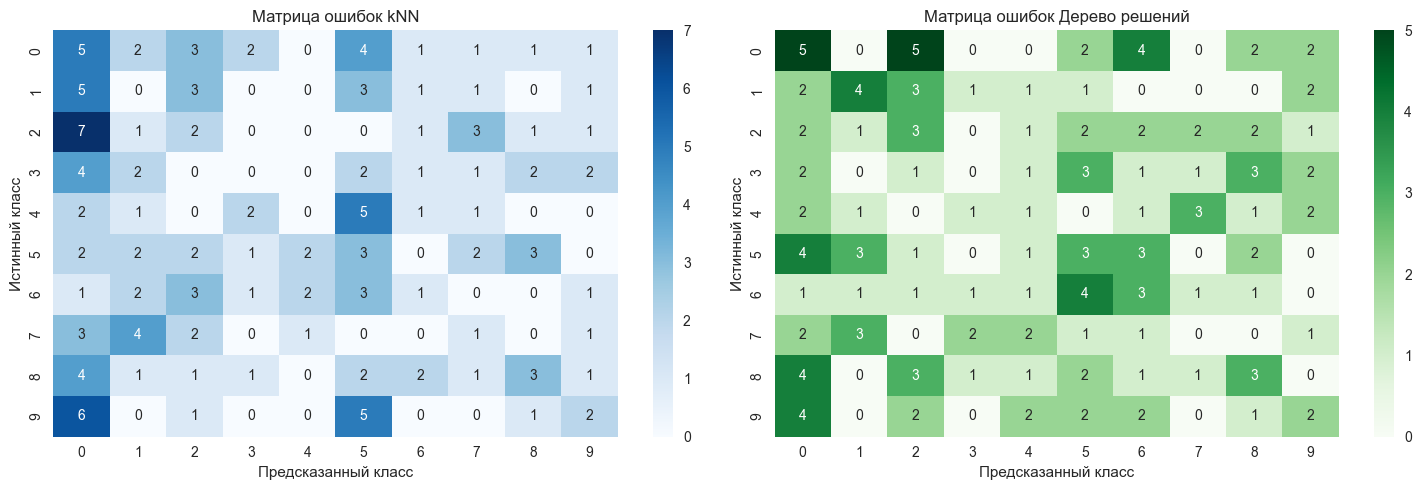

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Матрица ошибок kNN')
ax1.set_xlabel('Предсказанный класс')
ax1.set_ylabel('Истинный класс')

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title('Матрица ошибок Дерево решений')
ax2.set_xlabel('Предсказанный класс')
ax2.set_ylabel('Истинный класс')

plt.tight_layout()
plt.show()

#### **ROC-кривые для двух алгоритмов классификации**

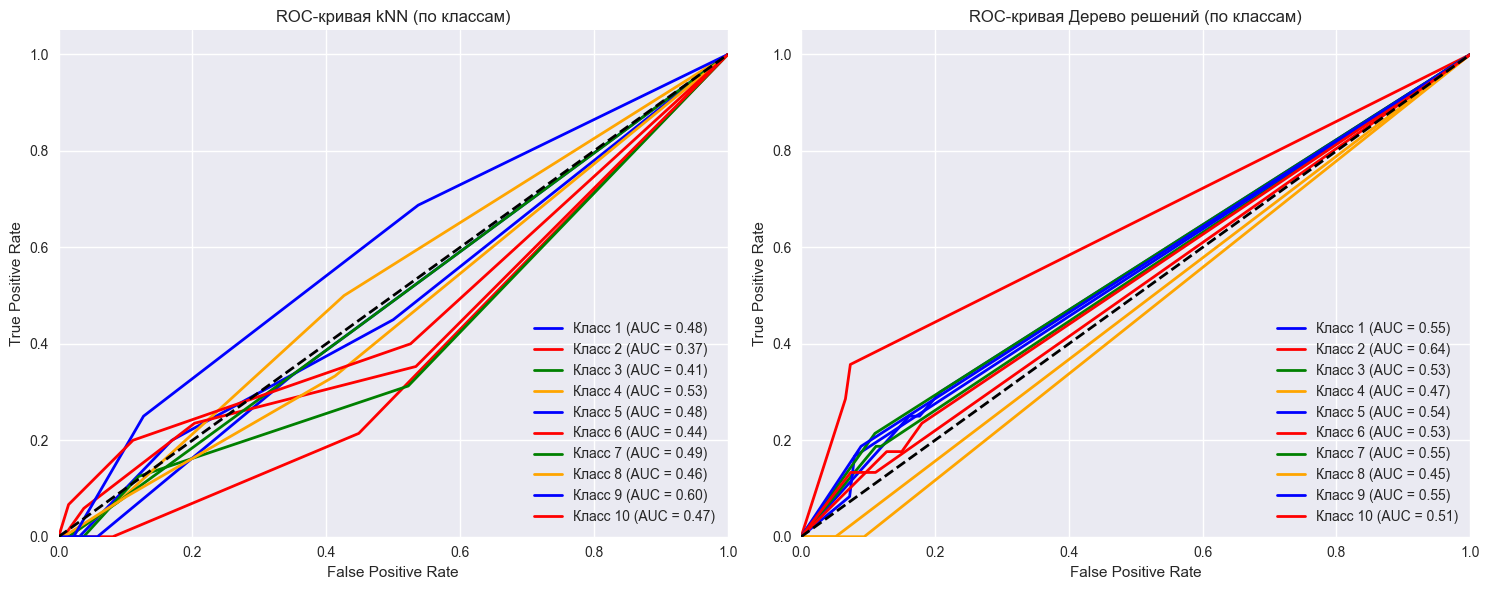

Макро-усредненный AUC kNN: 0.4731
Макро-усредненный AUC Дерево решений: 0.5333


In [120]:
classes = sorted(y_train.unique())
n_classes = len(classes)
from sklearn.metrics import roc_curve, auc
from itertools import cycle

classes = sorted(y_train.unique())
n_classes = len(classes)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ROC для kNN
fpr = {}
tpr = {}
roc_auc = {}

for i, cls in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == cls).astype(int), y_prob_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(n_classes), colors):
    ax1.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Класс {classes[i]} (AUC = {roc_auc[i]:0.2f})')

ax1.plot([0, 1], [0, 1], 'k--', lw=2)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC-кривая kNN (по классам)')
ax1.legend(loc="lower right")

fpr = {}
tpr = {}
roc_auc_dt = {}

for i, cls in enumerate(classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == cls).astype(int), y_prob_dt[:, i])
    roc_auc_dt[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(n_classes), colors):
    ax2.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Класс {classes[i]} (AUC = {roc_auc_dt[i]:0.2f})')

ax2.plot([0, 1], [0, 1], 'k--', lw=2)
ax2.set_xlim([0, 1])
ax2.set_ylim([0, 1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC-кривая Дерево решений (по классам)')
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Макро-усреднение
macro_auc_knn = np.mean(list(roc_auc.values()))
macro_auc_dt = np.mean(list(roc_auc_dt.values()))

print(f"Макро-усредненный AUC kNN: {macro_auc_knn:.4f}")
print(f"Макро-усредненный AUC Дерево решений: {macro_auc_dt:.4f}")

#### **Визуализация дерева решений**

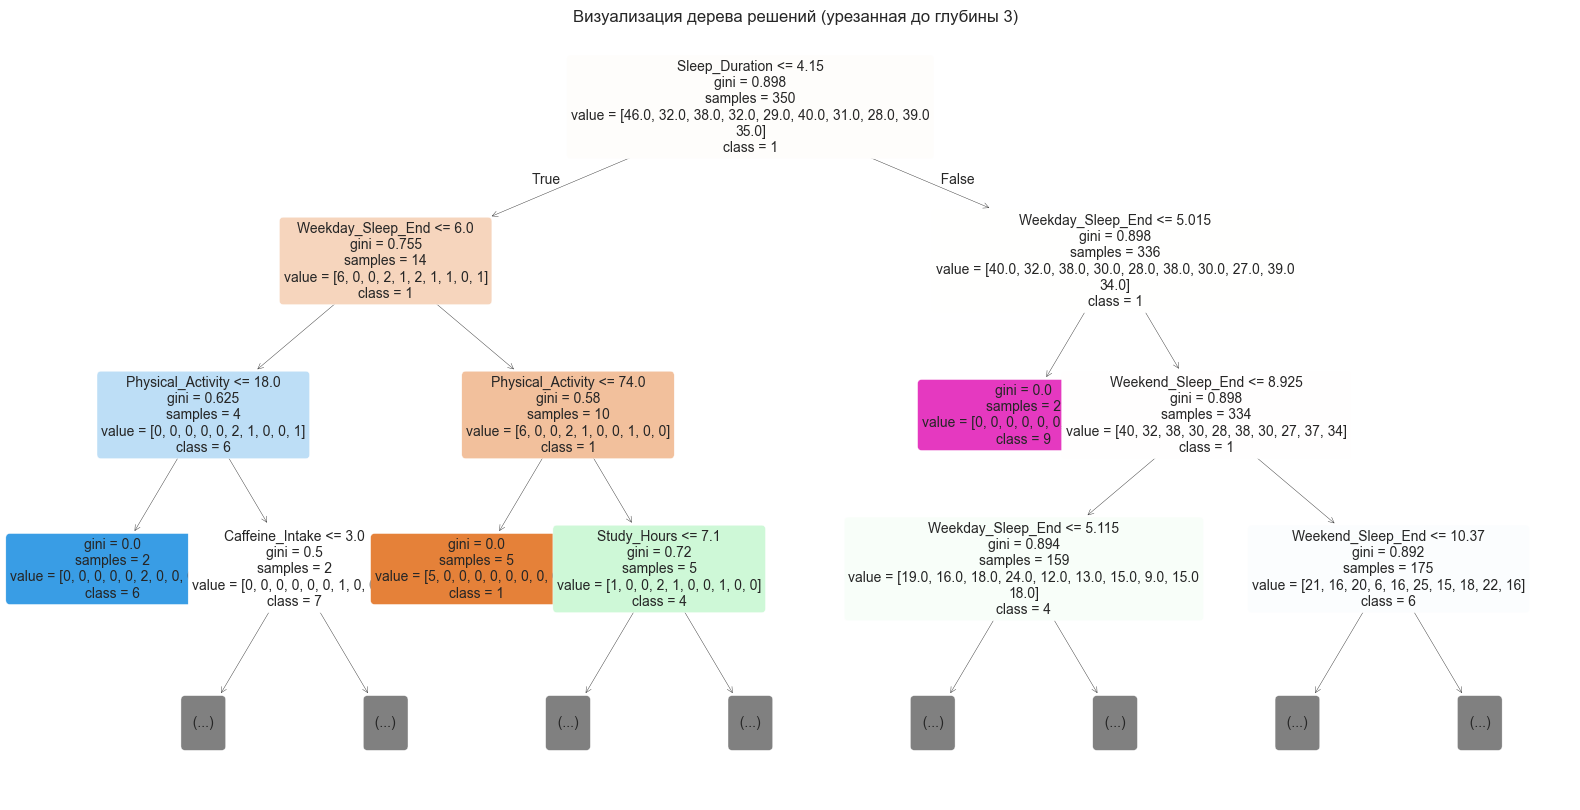

In [121]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, 
          class_names=list(map(str, classes)), rounded=True, max_depth=3, fontsize=10)
plt.title("Визуализация дерева решений (урезанная до глубины 3)")
plt.show()

#### **Кросс-валидация для двух алгоритмов классификации**

In [122]:
knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Кросс-валидация kNN (точность): {knn_scores.mean():.3f} ± {knn_scores.std():.3f}")

dt_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
print(f"Кросс-валидация Дерево решений (точность): {dt_scores.mean():.3f} ± {dt_scores.std():.3f}")

Кросс-валидация kNN (точность): 0.114 ± 0.009
Кросс-валидация Дерево решений (точность): 0.077 ± 0.047


#### **Важность признаков для дерева решений**

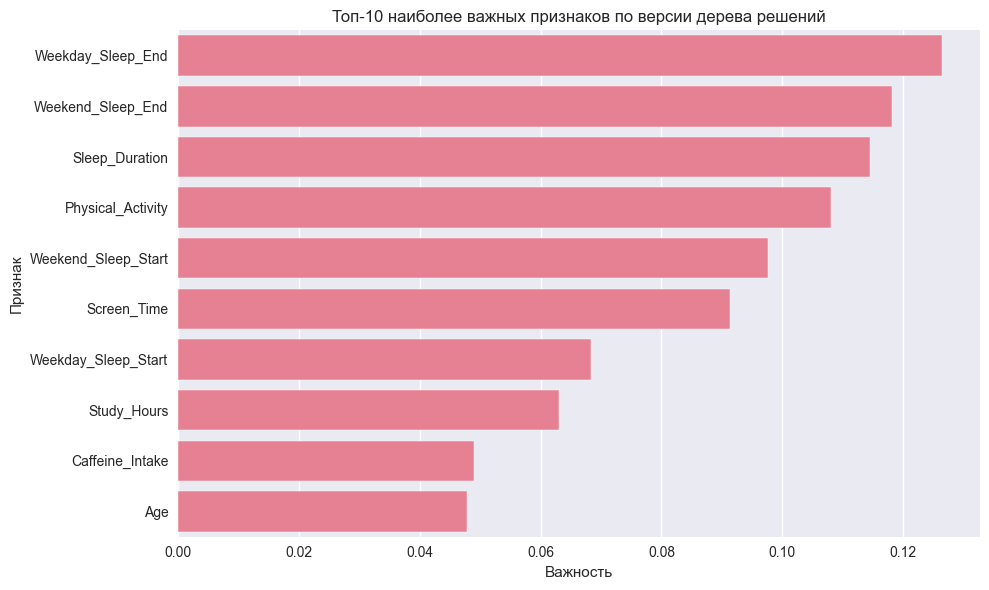

Важность признаков в дереве решений:
                Признак  Важность
9     Weekday_Sleep_End  0.126422
10    Weekend_Sleep_End  0.118239
2        Sleep_Duration  0.114513
6     Physical_Activity  0.108115
8   Weekend_Sleep_Start  0.097639
4           Screen_Time  0.091377
7   Weekday_Sleep_Start  0.068382
3           Study_Hours  0.063104
5       Caffeine_Intake  0.049043
0                   Age  0.047898


In [123]:
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': dt.feature_importances_
}).sort_values('Важность', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Важность', y='Признак', data=feature_importance.head(10))
plt.title('Топ-10 наиболее важных признаков по версии дерева решений')
plt.tight_layout()
plt.show()

print("Важность признаков в дереве решений:")
print(feature_importance.head(10))

#### **Сводная таблица метрик**

In [124]:
metrics_summary = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision (макро)', 'Recall (макро)', 'F1-score (макро)', 'AUC (макро)'],
    'kNN': [
        accuracy_score(y_test, y_pred_knn),
        classification_report(y_test, y_pred_knn, output_dict=True)['macro avg']['precision'],
        classification_report(y_test, y_pred_knn, output_dict=True)['macro avg']['recall'],
        classification_report(y_test, y_pred_knn, output_dict=True)['macro avg']['f1-score'],
        macro_auc_knn
    ],
    'Дерево решений': [
        accuracy_score(y_test, y_pred_dt),
        classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['precision'],
        classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['recall'],
        classification_report(y_test, y_pred_dt, output_dict=True)['macro avg']['f1-score'],
        macro_auc_dt
    ]
})

print("Сравнительная таблица метрик:")
metrics_summary

Сравнительная таблица метрик:


,Метрика,kNN,Дерево решений
0,Accuracy,0.113333,0.160000
1,Precision (макро),0.104560,0.141840
2,Recall (макро),0.102707,0.151814
3,F1-score (макро),0.098716,0.145437
4,AUC (макро),0.473078,0.533286


## **Вывод**

В ходе проделанной работы с данным датасетом были приобретены и применены важные навыки анализа данных и машинного обучения: освоены методы предобработки данных, включая преобразование категориальных признаков с использованием One-Hot Encoding, масштабирование числовых признаков с помощью StandardScaler для обеспечения корректной работы алгоритмов, основанных на вычислении расстояний. Были изучены и применены на практике два различных алгоритма классификации — k-ближайших соседей (kNN) и дерево решений, что позволило сравнить их эффективность для решения задачи прогнозирования качества сна.
